In [26]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
end_date = datetime.now()

df = yf.download('TSLA',end=end_date)



[*********************100%***********************]  1 of 1 completed


In [20]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000


In [22]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000


In [29]:
df.to_csv('TESLA.csv',index=False)

<AxesSubplot: xlabel='Date'>

<Figure size 1000x1200 with 0 Axes>

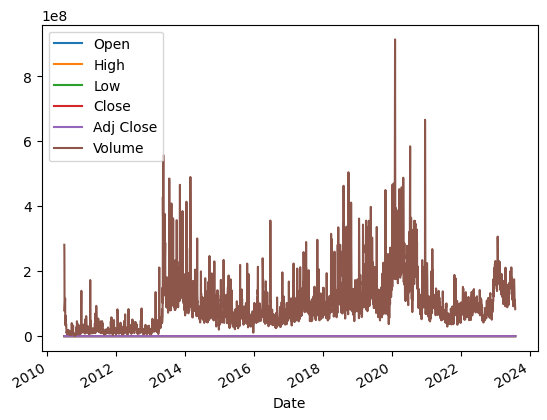

In [28]:
plt.figure(figsize=(10,12))
df.plot()